In [ ]:
!pip install langchain langchain_community language-tool-python langchain-ollama


In [ ]:
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import CommaSeparatedListOutputParser
from langchain_core.prompts import PromptTemplate
import csv


# 모델 생성

In [ ]:
# llm = ChatOllama(model="Lama3.2-korean:latest", max_token = 500)
llm = ChatOllama(model="llama3.2", max_token=50, temperature=0)

# 프롬프트 

In [ ]:
# 포함할 단어 목록
# words = ["apple", "school", "book", "play", "friend", "happy", "jump", "sun", "water", "cat","blind", "count", "cover", "flat", "guide", "record", "sink", "wide", "boil", "chew", "fill", "fold", "gentle", "shake", "tie", "wave", "explore", "highlight", "lead", "lift", "quick", "shut", "suit", "wrap", "bake", "boring", "bring", "desert", "dig", "feed", "leave", "seek", "alarm", "burn", "candle", "faint", "handle", "neat", "pile", "remember"
# ]

words = [
    "apple",
    "book",
    "cat",
    "dog",
    "fish",
    "happy",
    "jump",
    "kite",
    "love",
    "moon",
    "play",
    "sun",
    "tree",
    "water",
    "bird",
    "dance",
    "egg",
    "flag",
    "game",
    "home",
    "ice",
    "joy",
    "key",
    "leaf",
    "milk",
    "nose",
    "orange",
    "pen",
    "queen",
    "rain",
    "star",
    "toy",
    "umbrella",
    "van",
    "wind",
    "yellow",
    "zoo",
    "ant",
    "ball",
    "car",
    "desk",
    "ear",
    "frog",
    "goat",
    "hat",
    "ink",
    "jam",
    "king",
    "lamp",
    "mouse",
    "net",
    "ox",
    "pig",
    "quilt",
    "red",
    "ship",
    "top",
    "up",
    "vest",
    "wall",
    "x-ray",
    "yak",
    "zip",
    "air",
    "bread",
    "chair",
    "duck",
    "eye",
    "foot",
    "glove",
    "hair",
    "iron",
    "juice",
    "kitten",
    "lion",
    "mouth",
    "nut",
    "oven",
    "pizza",
    "queen",
    "rose",
    "sock",
    "tent",
    "uncle",
    "vase",
    "wolf",
    "yarn",
    "zero",
    "apple",
    "balloon",
    "clown",
    "dragon",
    "earth",
    "flower",
    "guitar",
    "heart",
    "island",
    "jungle",
    "kangaroo",
]

# PromptTemplate 설정
prompt_template = PromptTemplate(
    input_variables=["word"],
    template="""
    Write a simple English sentence (5-8 words) that an elementary school student can understand. 
    The sentence must include the word '{word}' exactly as it is, without any modifications or variations.
    Avoid using conjunctions and ensure that the sentence is not a compound sentence. 
    Make sure to create only one complete sentence for each word. Use words commonly used in the US.
    No describe, only sentence
    """,
)

# 출력 파서

In [72]:
output_parser = CommaSeparatedListOutputParser()

# 체인 생성

In [ ]:
chain = prompt_template | llm | output_parser

# 실행 코드(테스트)

In [ ]:
# CSV 파일 생성
from random import randint

sentences = []

with open("grammar_sentences.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["문장 번호", "문장", "포함된 단어"])

    # 각 단어에 대해 문장 생성 및 저장
    for idx, word in enumerate(words, start=1):
        rand = randint(1, 6)
        response = chain.invoke({"word": word})  # 체인 실행

        # 파싱된 문장 기록
        for sentence in response:
            writer.writerow([idx, sentence, word])
            print(sentence)
            sentences.append(sentence)

The teacher gave an apple to the student.
The book is on my desk.
The cat is sleeping on my bed.
The dog is very happy outside today.
The fish are swimming very quickly outside today.
The teacher made everyone happy at school.
The kids love to jump on the trampoline.
The girl flew her kite very high outside.
I love playing with my best friend outside.
The moon is shining brightly in the sky tonight.
The kids will play outside every day.
The sun shines brightly in the sky.
The big tree is very tall outside.
The water is cold outside today.
The bird is singing outside my window.
The kids love to dance at school.
The egg was placed carefully on the plate.
The American flag waves high in the air.
The kids are playing a fun game outside.
I am going home after school today.
The ice cream truck is coming today outside.
The children felt great joy on their birthday.
The key unlocks the old wooden door.
The leaf fell from the tree slowly.
The child drank milk from her carton.
The boy sniffed hi

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# GPT-2 모델 및 토크나이저 불러오기
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)


def calculate_perplexity(sentence):
    inputs = tokenizer(sentence, return_tensors="pt")
    with torch.no_grad():
        loss = model(**inputs, labels=inputs["input_ids"]).loss
    perplexity = torch.exp(loss).item()
    return perplexity


# 각 문장의 퍼플렉시티 계산 및 저장
perplexities = []

for sentence in sentences:
    perp = calculate_perplexity(sentence)
    perplexities.append(perp)
    print(f"Sentence: {sentence}")
    print(f"Perplexity: {perp}")
    print()

# 전체 문장의 평균 퍼플렉시티 계산
average_perplexity = sum(perplexities) / len(perplexities) if perplexities else 0
print(f"Average Perplexity: {average_perplexity}")

# 1. Min-Max 정규화
min_perp = min(perplexities)
max_perp = max(perplexities)
normalized_perplexities_min_max = [
    (p - min_perp) / (max_perp - min_perp) for p in perplexities
]

# Min-Max 정규화 후 평균
average_normalized_perplexity_min_max = sum(normalized_perplexities_min_max) / len(
    normalized_perplexities_min_max
)
print(f"Min-Max Normalized Average Perplexity: {average_normalized_perplexity_min_max}")

# 2. Z-score 정규화
mean_perp = sum(perplexities) / len(perplexities)
std_dev_perp = (
    sum((p - mean_perp) ** 2 for p in perplexities) / len(perplexities)
) ** 0.5
normalized_perplexities_z_score = [(p - mean_perp) / std_dev_perp for p in perplexities]

# Z-score 정규화 후 평균
average_normalized_perplexity_z_score = sum(normalized_perplexities_z_score) / len(
    normalized_perplexities_z_score
)
print(f"Z-score Normalized Average Perplexity: {average_normalized_perplexity_z_score}")

Sentence: The teacher gave an apple to the student.
Perplexity: 75.00172424316406

Sentence: The book is on my desk.
Perplexity: 59.23171615600586

Sentence: The cat is sleeping on my bed.
Perplexity: 49.31749725341797

Sentence: The dog is very happy outside today.
Perplexity: 151.8748016357422

Sentence: The fish are swimming very quickly outside today.
Perplexity: 294.9403991699219

Sentence: The teacher made everyone happy at school.
Perplexity: 128.21697998046875

Sentence: The kids love to jump on the trampoline.
Perplexity: 29.01205825805664

Sentence: The girl flew her kite very high outside.
Perplexity: 263.90625

Sentence: I love playing with my best friend outside.
Perplexity: 77.22325897216797

Sentence: The moon is shining brightly in the sky tonight.
Perplexity: 30.019878387451172

Sentence: The kids will play outside every day.
Perplexity: 60.838104248046875

Sentence: The sun shines brightly in the sky.
Perplexity: 26.790977478027344

Sentence: The big tree is very tall

In [ ]:
sentence = [
    "The teacher gave an apple to the student.",
    "The book is on my desk.",
    "The cat is sleeping on my bed.",
    "The dog is very happy outside today.",
    "The fish are swimming very quickly outside today.",
    "The teacher made everyone happy at school.",
    "The kids love to jump on the trampoline.",
    "The girl flew her kite very high outside.",
    "I love playing with my best friend outside.",
    "The moon is shining brightly in the sky tonight.",
    "The kids will play outside every day.",
    "The sun shines brightly in the sky.",
    "The big tree is very tall outside.",
    "i don't dont ddjkf",
    "the big tree is very tall outside",
    "fasdfasdfasdfasdfasdfasdf",
    "i don't dont ddjkf",
]

In [ ]:
import spacy
from typing import Dict, Tuple


class GrammarScorer:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_lg")

        # 각 검사 항목별 가중치 설정
        self.weights = {
            "basic_requirements": 0.3,  # 기본 요구사항 (대문자, 문장부호 등)
            "sentence_structure": 0.3,  # 문장 구조 (주어, 동사 등)
            "word_count": 0.2,  # 단어 수 제한
            "complexity": 0.2,  # 문장 복잡도
        }

    def score_sentence(self, sentence: str) -> Tuple[float, Dict]:
        doc = self.nlp(sentence)
        scores = {}

        # 1. 문장의 첫 글글
        basic_checks = {
            "starts_with_capital": sentence[0].isupper(),
            "ends_with_punctuation": sentence.rstrip()[-1] in ".!?",
            "no_multiple_punctuation": not any(c * 2 in sentence for c in ".!?"),
        }
        scores["basic_requirements"] = sum(basic_checks.values()) / len(basic_checks)

        # 2. 문장 구조 검사 (0.3)
        structure_checks = {
            "has_subject": any(token.dep_ in ["nsubj", "nsubjpass"] for token in doc),
            "has_verb": any(token.pos_ == "VERB" for token in doc),
            "verb_agreement": self._check_verb_agreement(doc),
        }
        scores["sentence_structure"] = sum(structure_checks.values()) / len(
            structure_checks
        )

        # 3. 단어 수 검사 (0.2)
        word_count = len([token for token in doc if not token.is_punct])
        scores["word_count"] = self._score_word_count(word_count)

        # 4. 복잡도 검사 (0.2)
        complexity_scores = {
            "vocabulary_level": self._check_vocabulary_level(doc),
            "sentence_complexity": self._check_sentence_complexity(doc),
        }
        scores["complexity"] = sum(complexity_scores.values()) / len(complexity_scores)

        # 최종 점수 계산
        final_score = sum(
            score * self.weights[category] for category, score in scores.items()
        )

        return round(final_score, 2), scores

    def _check_verb_agreement(self, doc) -> bool:
        """주어-동사 일치 검사"""
        for token in doc:
            if token.dep_ == "nsubj":
                head = token.head
                if head.pos_ == "VERB":
                    # 간단한 일치 규칙 검사
                    return True
        return False

    def _score_word_count(self, count: int) -> float:
        """단어 수 기반 점수 계산 (5-8단어 목표)"""
        if 5 <= count <= 8:
            return 1.0
        elif count < 5:
            return max(0, count / 5)
        else:
            return max(0, 1 - (count - 8) / 4)

    def _check_vocabulary_level(self, doc) -> float:
        """어휘 수준 검사"""
        simple_words = 0
        total_words = 0

        for token in doc:
            if not token.is_punct and not token.is_space:
                total_words += 1
                if len(token.text) <= 6:  # 간단한 단어 기준
                    simple_words += 1

        return simple_words / total_words if total_words > 0 else 0

    def _check_sentence_complexity(self, doc) -> float:
        """문장 구조 복잡도 검사"""
        clause_count = sum(1 for token in doc if token.dep_ == "ROOT")
        if clause_count == 1:
            return 1.0
        elif clause_count == 2:
            return 0.5
        else:
            return 0.0

In [ ]:
score_c = GrammarScorer()
scores = []
sentences_text = []

for s in sentence:
    score, detail = score_c.score_sentence(s)
    scores.append(score)
    sentences_text.append(s)
    print(f"{s} : {score}")

The teacher gave an apple to the student. : 0.98
The book is on my desk. : 0.8
The cat is sleeping on my bed. : 0.99
The dog is very happy outside today. : 0.79
The fish are swimming very quickly outside today. : 0.96
The teacher made everyone happy at school. : 0.97
The kids love to jump on the trampoline. : 0.99
The girl flew her kite very high outside. : 0.99
I love playing with my best friend outside. : 0.98
The moon is shining brightly in the sky tonight. : 0.92
The kids will play outside every day. : 0.99
The sun shines brightly in the sky. : 0.99
The big tree is very tall outside. : 0.79
i don't dont ddjkf : 0.8
the big tree is very tall outside : 0.59
fasdfasdfasdfasdfasdfasdf : 0.34
i don't dont ddjkf : 0.8


In [ ]:
import pandas as pd

sentence = pd.read_csv("./grammar_sentences.csv")

sentences = sentence["문장"].tolist()


Overall Average Score: 0.94


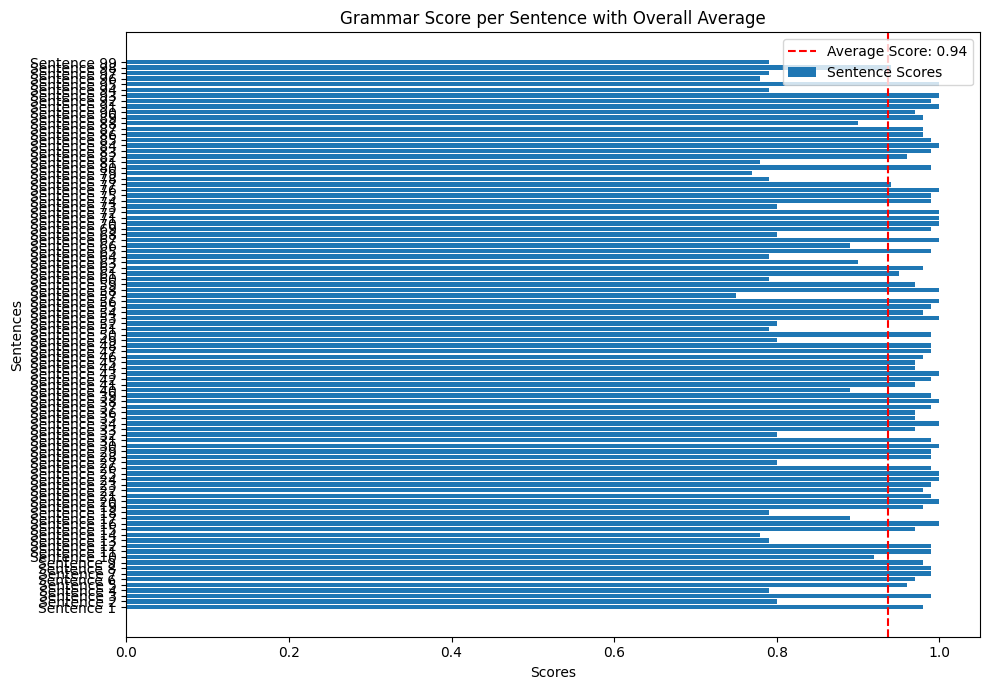

In [ ]:
import matplotlib.pyplot as plt

scorer = GrammarScorer()
scores = []
sentences_text = []

# Calculate scores for each sentence
for sentence in sentences:
    score, details = scorer.score_sentence(sentence)
    scores.append(score)
    sentences_text.append(sentence)

# Calculate the overall average score
average_score = sum(scores) / len(scores) if scores else 0
print(f"\nOverall Average Score: {average_score:.2f}")

# Plotting
plt.figure(figsize=(10, 7))
plt.barh(range(len(scores)), scores, label="Sentence Scores")
plt.axvline(
    average_score,
    color="red",
    linestyle="--",
    label=f"Average Score: {average_score:.2f}",
)

# Adding labels and title
plt.yticks(
    range(len(sentences_text)), [f"Sentence {i+1}" for i in range(len(sentences_text))]
)
plt.ylabel("Sentences")
plt.xlabel("Scores")
plt.title("Grammar Score per Sentence with Overall Average")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()